# **Text Classification using Naive Bayes Algorithm**

# import libraries 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Loading the Dataset

In [4]:
data = fetch_20newsgroups()
categories = data.target_names

train_data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
test_data = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

# Exploring the Dataset

In [5]:
print(f"Number of Training Samples: {len(train_data.data)}")
print(f"Number of Test Samples: {len(test_data.data)}")
print(f"Target Categories: {train_data.target_names}\n")

Number of Training Samples: 11314
Number of Test Samples: 7532
Target Categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']



# Deploy the model

In [6]:
# TfidfVectorizer is used for tokenization 
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train_data.data, train_data.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [7]:
predictions = model.predict(test_data.data)

In [8]:
accuracy = accuracy_score(test_data.target, predictions)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%\n")


Model Accuracy: 60.62%



In [13]:
print("Classification Report:")
print(classification_report(test_data.target, predictions, target_names=train_data.target_names))

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.81      0.07      0.13       319
           comp.graphics       0.72      0.62      0.67       389
 comp.os.ms-windows.misc       0.70      0.50      0.59       394
comp.sys.ibm.pc.hardware       0.55      0.75      0.64       392
   comp.sys.mac.hardware       0.81      0.61      0.69       385
          comp.windows.x       0.83      0.74      0.78       395
            misc.forsale       0.86      0.69      0.77       390
               rec.autos       0.82      0.68      0.74       396
         rec.motorcycles       0.89      0.63      0.73       398
      rec.sport.baseball       0.95      0.69      0.80       397
        rec.sport.hockey       0.59      0.90      0.71       399
               sci.crypt       0.47      0.80      0.59       396
         sci.electronics       0.77      0.43      0.55       393
                 sci.med       0.86      0.63      0

# Confusion Matrix

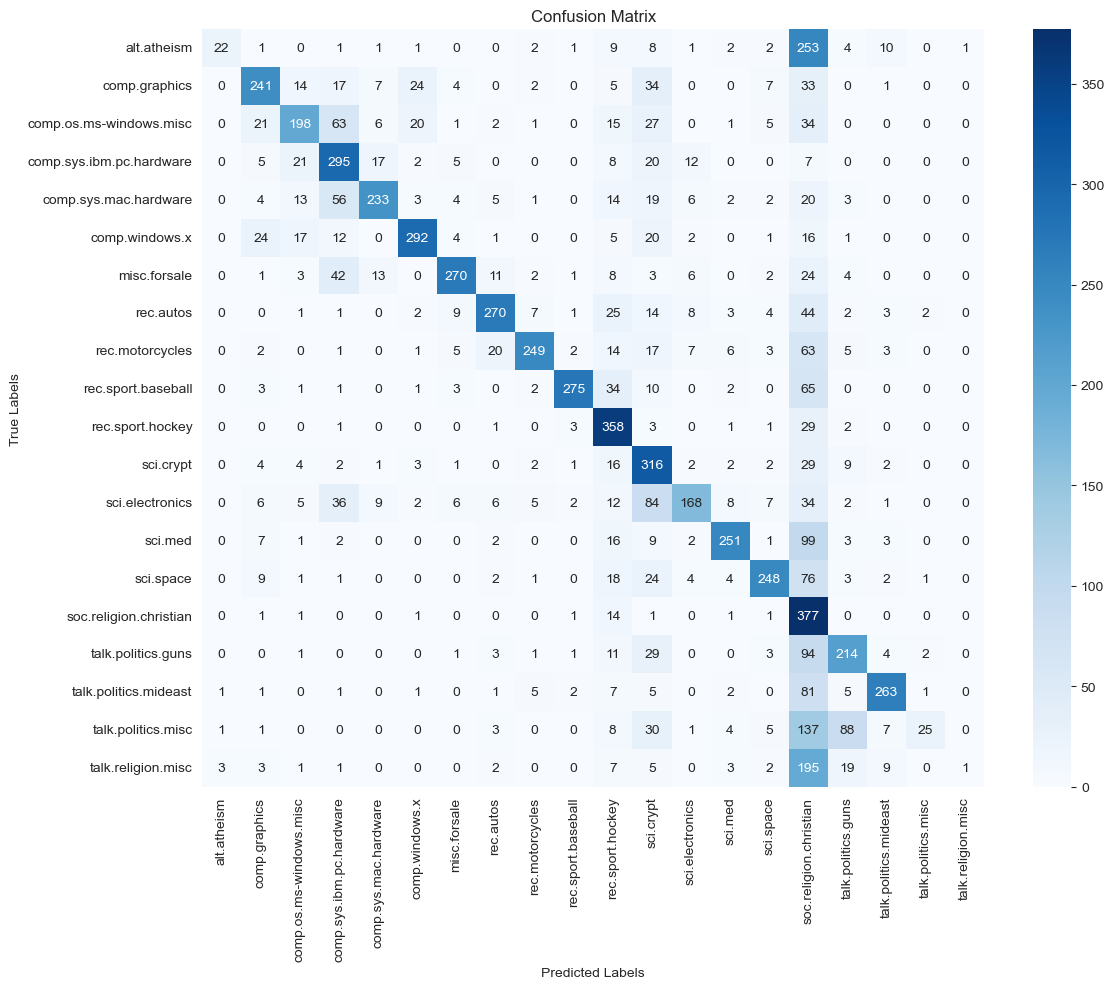

In [10]:
conf_mat = confusion_matrix(test_data.target, predictions)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.target_names, yticklabels=train_data.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#  Example Prediction

In [11]:
def predict_category(text, model=model, categories=train_data.target_names):
    pred = model.predict([text])[0]
    return categories[pred]

In [12]:
examples = [
    "NASA is planning new space missions to explore Mars.",
    "The latest version of Windows has new features for better security.",
    "The new iPhone has an advanced camera and fast processor.",
    "The hockey game last night was incredibly intense and exciting.",
    "Cryptography is essential for securing online communications."
]

for example in examples:
    print(f"\n Example Prediction: '{example}'\nPredicted Category: {predict_category(example)}")


 Example Prediction: 'NASA is planning new space missions to explore Mars.'
Predicted Category: sci.space

 Example Prediction: 'The latest version of Windows has new features for better security.'
Predicted Category: comp.os.ms-windows.misc

 Example Prediction: 'The new iPhone has an advanced camera and fast processor.'
Predicted Category: misc.forsale

 Example Prediction: 'The hockey game last night was incredibly intense and exciting.'
Predicted Category: rec.sport.hockey

 Example Prediction: 'Cryptography is essential for securing online communications.'
Predicted Category: sci.crypt
